# SVM Assignment
## Problem 1: Steepest descent by Lagrange's                                  method of undetermined multipliers


In [ ]:
 for j in range(n_samples): # iterating through the number of samples 
            lam_j_new = self.lam_sv[j] + self.lr * (1 -  (np.dot(y[j] * self.lam_sv.T, self.kernel(X[j], X)))) # lagrangian method of undetermined multipliers
            self.lam_sv[j] = max(0, lam_j_new) # ensuring that only lam_j_new > 0 is returned

### Problem 2: Determination of support vectors

In [ ]:
for i in range(n_samples):
            if self.lam_sv[i] > self.threshold: # lagrangian multiplier greater than threshold condition
                self.index_support_vectors[self.n_support_vectors] = i # initialize support vector index
                self.X_sv[self.n_support_vectors, :] = X[i, :] # initialize the support vector
                self.lam_sv[self.n_support_vectors] = self.lam_sv[i]
                self.y_sv[self.n_support_vectors] = y[i]
                self.n_support_vectors += 1

### Question 3: Presumption

In [ ]:
# At the time of estimation, the kernel function calculates the features of the data to be estimated and the features of the support vectors. The sign of the obtained y_pred is the classification result.
def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
             y_pred[i] = np.sign(np.dot(self.lam_sv.T , self.kernel(self.X_sv, X[i])))# return either positive or negative
        return y_pred

### Question 4: Learning and Estimation

In [2]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
class ScratchSVMClassifier(): # setting up a class ScratchSVMClassifier
    def __init__(self, num_iter, lr, kernel = 'linear', threshold = 1e-5, verbose = False):
        self.num_iter = num_iter
        self.lr = lr
        self.k = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.n_support_vectors = 0
        self.index_support_vectors = np.array([])
        self.X_sv = np.array([])
        self.lam_sv = np.array([])
        self.y_sv = np.array([])
        
    def kernel(self, X1, X2):
        if self.k == 'linear':
            return np.dot(X1, X2.T)
        elif self.k == 'polynomial':
            return (np.dot(X1, X2.T) + 1) ** 2
        else:
            raise ValueError(f"Invalid kernel: {self.kernel}")
            
    def fit(self, X, y, X_val = None, y_val = None):
        n_samples, n_features = X.shape
        self.n_support_vectors = n_samples
        self.index_support_vectors = np.zeros(n_samples)
        self.X_sv = np.zeros((n_samples, n_features))
        self.lam_sv = np.zeros((n_samples, 1))
        self.y_sv = np.zeros((n_samples, 1))
        
        for j in range(n_samples):
            lam_j_new = self.lam_sv[j] + self.lr * (1 -  (np.dot(y[j] * self.lam_sv.T, self.kernel(X[j], X))))
            self.lam_sv[j] = max(0, lam_j_new) 
            
        for i in range(n_samples):
            self.n_support_vectors = 0
            if self.lam_sv[i] > self.threshold:
                self.index_support_vectors[self.n_support_vectors] = i
                self.X_sv[self.n_support_vectors, :] = X[i, :]
                self.lam_sv[self.n_support_vectors] = self.lam_sv[i]
                self.y_sv[self.n_support_vectors] = y[i]
                self.n_support_vectors += 1
                
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
             y_pred[i] = np.sign(np.dot(self.lam_sv.T , self.kernel(self.X_sv, X[i])))# return either positive or negative
        return y_pred
    

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:100,:]
y = iris.target[:100]
y = np.where(y==0, -1,1)
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.2)


In [6]:
svc = ScratchSVMClassifier(num_iter=1000000000, lr=0.0001, kernel = 'linear',threshold = 1e-5,verbose=True)
svc.fit(X_train, y_train, X_test, y_test)

In [7]:
y_predsvm = svc.predict(X_test)

In [8]:
print(y_predsvm)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [9]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred)/len(y_true)

In [10]:
accuracy(y_test, y_predsvm)

0.45

## Scikit-Learn Version

In [11]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [12]:
y_predsvm1 = svm_model.predict(X_test)
y_predsvm1

array([ 1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,
       -1, -1, -1])

In [14]:
#accuracy score for scratch svm implementation
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predsvm)

0.45

In [15]:
# accuracy score for scikit learn implementation
accuracy_score(y_test, y_predsvm1)

1.0

In [16]:
#precision score for scratch svm implementation
from sklearn.metrics import precision_score
precision_score(y_test, y_predsvm) # for precision score best value is 1 worst value is 0

0.45

In [18]:
# precision score for scikit learn implementation
precision_score(y_test, y_predsvm1)

1.0

In [20]:
# recall score for scratch svm implementation
from sklearn.metrics import recall_score
recall_score(y_test, y_predsvm) #for recall_score best value is 1 worst value is 0

1.0

In [21]:
# recall score for scikit learn implementation
recall_score(y_test, y_predsvm1)

1.0

### Problem 5: Visualization of the decision region

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:100,:2]
y = iris.target[:100]
y = np.where(y==0, -1,1)
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.2)


In [39]:
svc = ScratchSVMClassifier(num_iter=1000, lr=0.01, kernel = 'linear',threshold = 1e-5,verbose=True)
svc.fit(X_train, y_train, X_test, y_test)

In [40]:
y_predsvm = svc.predict(X_test)

In [46]:
def decision_region(X,y,svc):
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01), 
        np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01)
    )
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = svc.predict(mesh).reshape(mesh_f0.shape)
    plt.title('decision region')
    plt.xlabel('feature0')
    plt.ylabel('feature1')
    plt.contourf(mesh_f0, mesh_f1, y_pred,cmap=ListedColormap(['pink', 'skyblue']))
    plt.contour(mesh_f0, mesh_f1, y_pred,colors='red',levels=[-1, 0, 1],linestyles=['--', '-', '--'])
    plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1],label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label='1')
    plt.scatter(svc.X_sv[:,0],svc.X_sv[:,1], facecolors = 'red' )
    plt.legend()
    plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_3500\2236627404.py:12: UserWarning: No contour levels were found within the data range.
  plt.contour(mesh_f0, mesh_f1, y_pred,colors='red',levels=[-1, 0, 1],linestyles=['--', '-', '--'])


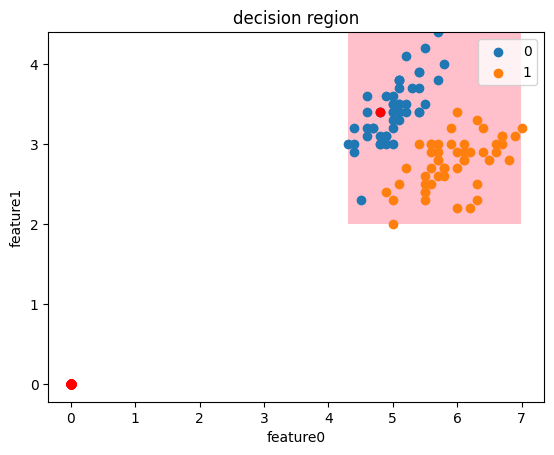

In [47]:
decision_region(X, y, svc)